In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataFile = "Data/GoldPriceData.csv"

goldRateDf = pd.read_csv(dataFile, index_col='Date',parse_dates=True)
# columns contain Special Characters and spaces

columns_modified = ['Open', 'High', 'Low', 'Close', 'WAP', 'No_of_Shares', 'No_of_Trades',
       'Total_Turnover', 'Deliverable_Quantity', 'Pct_Deli_Qty_to_Traded_Qty',
       'Spread_H-L', 'Spread_C-O']
goldRateDf.columns = columns_modified
goldRateDf.reindex()

,Open,High,Low,Close,WAP,No_of_Shares,No_of_Trades,Total_Turnover,Deliverable_Quantity,Pct_Deli_Qty_to_Traded_Qty,Spread_H-L,Spread_C-O
Date,,,,,,,,,,,,
2017-02-06,0.79,0.79,0.76,0.76,0.790000,7430.0,7.0,5848.0,7430.0,100.00,0.03,-0.03
2017-02-03,0.79,0.79,0.79,0.79,0.790000,310.0,4.0,244.0,310.0,100.00,0.00,0.00
2017-02-02,0.83,0.83,0.83,0.83,0.830000,75.0,1.0,62.0,75.0,100.00,0.00,0.00
2017-01-31,0.87,0.87,0.87,0.87,0.870000,1050.0,2.0,913.0,1050.0,100.00,0.00,0.00
2017-01-25,0.91,0.91,0.91,0.91,0.910000,400.0,1.0,364.0,400.0,100.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-07,65.55,71.00,57.60,65.25,64.071524,42741.0,286.0,2738481.0,14444.0,33.79,13.40,-0.30
2009-12-04,84.95,84.95,66.30,71.95,73.919145,133820.0,430.0,9891860.0,82395.0,61.57,18.65,-13.00
2009-12-03,72.00,72.00,65.20,70.80,71.469977,84551.0,368.0,6042858.0,61676.0,72.95,6.80,-1.20


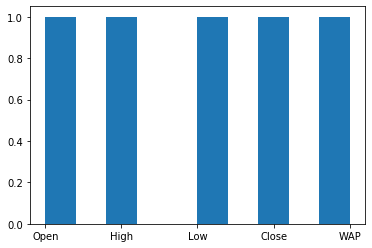

In [3]:
#plt.figure(figsize=(10,10))
_ = plt.hist(['Open', 'High', 'Low', 'Close', 'WAP'], data=goldRateDf)
plt.ylim = (0,100)


In [4]:
# add new col mean_day_price = np.mean('High', 'Low') and drop columns "'Open', 'High', 'Low', 'Close', 'WAP'"

goldRateDf['Avg_Price'] = (goldRateDf['High'] + goldRateDf['Low']) / 2
goldRateDf.drop(['Open', 'High', 'Low', 'Close', 'WAP'],axis=1,inplace=True)

goldRateDf.describe()

,No_of_Shares,No_of_Trades,Total_Turnover,Deliverable_Quantity,Pct_Deli_Qty_to_Traded_Qty,Spread_H-L,Spread_C-O,Avg_Price
count,1660.000000,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000
mean,101330.338554,122.983735,1.664520e+06,75754.484337,88.678651,0.952470,-0.160434,11.697813
std,140560.465729,138.844766,2.938726e+06,96646.348605,16.648158,1.960071,1.342787,16.913609
min,1.000000,1.000000,0.000000e+00,1.000000,4.760000,0.000000,-17.150000,0.520000
25%,4393.250000,14.000000,7.159500e+03,4300.000000,78.932500,0.040000,-0.150000,1.340000
50%,33871.000000,72.500000,1.086300e+05,31095.000000,100.000000,0.180000,0.000000,5.170000
75%,153416.750000,185.250000,2.057775e+06,122723.000000,100.000000,0.890000,0.030000,11.543750
max,849341.000000,752.000000,2.383048e+07,631381.000000,100.000000,23.300000,14.000000,75.750000


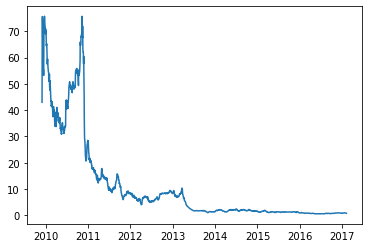

In [5]:
#plt.figure(figsize=(10,10))
_ = plt.plot(goldRateDf['Avg_Price'])
#_ = plt.axis([0, 0.1])
_ = plt.show()

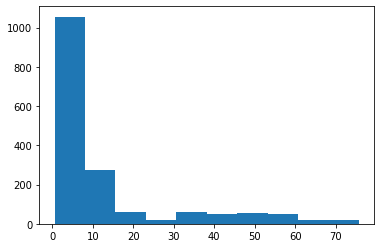

In [6]:
_=plt.hist(goldRateDf['Avg_Price'],histtype='bar')
_=plt.show()

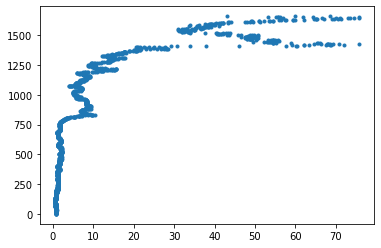

In [7]:
#goldRateDf_grouped = goldRateDf.groupby(by=[goldRateDf.index.month, goldRateDf.index.year]).max()
#goldRateDf_grouped.reset_index()
#goldRateDf_grouped.head(10)

years = np.array(range(1660))
_=plt.scatter(goldRateDf['Avg_Price'],years,marker='.')
_= plt.show()

#?plt.scatter

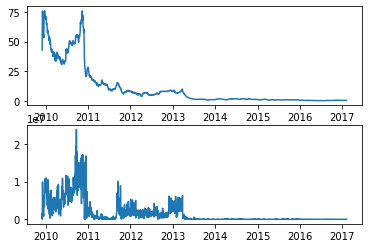

In [8]:
plt.subplot(211)
_ = plt.plot(goldRateDf['Avg_Price'])
#_ = plt.axis([0, 0.1])
plt.subplot(212)
_=plt.plot(goldRateDf['Total_Turnover'])
_ = plt.show()